**Series Temporais**

**Aula 03**

**prof: Sergio Assuncao Monteiro, DSc**

lattes: http://lattes.cnpq.br/9489191035734025

# **Etapas Iniciais**

**Aquisição de Dados**

In [1]:
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 42.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import pandas as pd
import numpy as np
import yfinance as yf #Instalando e importando a API no código
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [3]:
codigo = ['PETR4.SA']
df = yf.download(codigo[0], 
                 start='2021-09-01', 
                 end='2021-11-01',
                 group_by="ticker"); # ";" serve para não exibir os dados

[*********************100%***********************]  1 of 1 completed


**Visualização dos dados**

In [4]:
with pd.option_context('display.max_rows',10):
  print(df)

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2021-09-01  27.320000  27.340000  26.330000  27.040001  16.077499   69430400
2021-09-02  27.000000  27.350000  26.459999  26.600000  15.815884   56052000
2021-09-03  26.650000  26.780001  26.100000  26.330000  15.655346   58182700
2021-09-06  26.209999  26.709999  26.150000  26.459999  15.732640   26770700
2021-09-08  26.290001  26.350000  24.790001  24.969999  14.846712   80378400
...               ...        ...        ...        ...        ...        ...
2021-10-25  27.760000  29.309999  27.650000  29.040001  17.266663  135830600
2021-10-26  28.799999  29.230000  28.600000  28.760000  17.100180   57865600
2021-10-27  28.830000  29.059999  28.469999  28.690001  17.058559   57579200
2021-10-28  28.530001  29.250000  28.250000  28.959999  17.219095   89578000
2021-10-29  29.129999  29.190001  26.969999  27.150000  16.142902  157340000

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,41.000000,41.000000,41.000000,41.000000,41.000000,4.100000e+01
mean,27.424634,27.851951,26.927561,27.411463,16.298364,8.166232e+07
std,1.496359,1.484190,1.552663,1.502684,0.893469,2.974698e+07
min,24.080000,24.650000,23.790001,24.650000,14.656447,2.677070e+07
25%,26.080000,26.459999,25.770000,26.330000,15.655346,6.098320e+07
50%,27.209999,27.760000,26.820000,27.180000,16.160740,7.247990e+07
75%,28.830000,29.230000,28.250000,28.760000,17.100180,8.957800e+07
max,29.860001,30.219999,29.510000,29.680000,17.647196,1.573400e+08


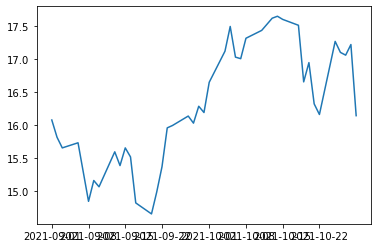

In [6]:
plt.plot(df["Adj Close"])
plt.show()

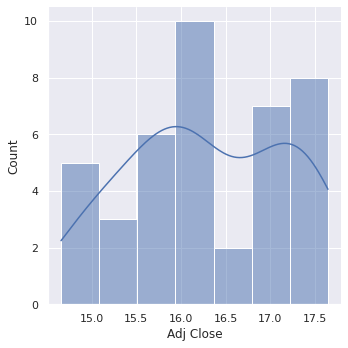

In [7]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.displot(df['Adj Close'].dropna(),kde=True)

# **Abordagem Estatística**

**ARIMA**

In [8]:
dados_treinamento, dados_teste = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
dados_treinamento = dados_treinamento['Close'].values
dados_teste = dados_teste['Close'].values
historico = [x for x in dados_treinamento]
modelo_preditivo = []

In [9]:
N_observacoes_teste = len(dados_teste)
for ponto_de_teste in range(N_observacoes_teste):
  modelo = ARIMA(historico, order=(1,1,0))  
  modelo_fit = modelo.fit(disp=0)
  saida = modelo_fit.forecast()
  yhat = saida[0]
  modelo_preditivo.append(yhat)
  valor_real_teste = dados_teste[ponto_de_teste]
  historico.append(valor_real_teste)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


**Cálculo do Erro**

In [10]:
erroMSE = mean_squared_error(dados_teste, modelo_preditivo)
print('O Erro Médio Quadrado (MSE) é {}'.format(erroMSE))

O Erro Médio Quadrado (MSE) é 0.8399780146291628


**Estudo Preditivo**

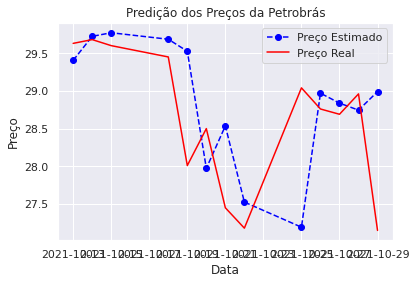

In [11]:
intervalo_dos_dados_de_teste = df[int(len(df)*0.7):].index
plt.plot(intervalo_dos_dados_de_teste, 
         modelo_preditivo, 
         color='blue', 
         marker='o', 
         linestyle='dashed',
         label='Preço Estimado')

plt.plot(intervalo_dos_dados_de_teste, 
         dados_teste, 
         color='red', 
         label='Preço Real')

plt.title('Predição dos Preços da Petrobrás')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.show()

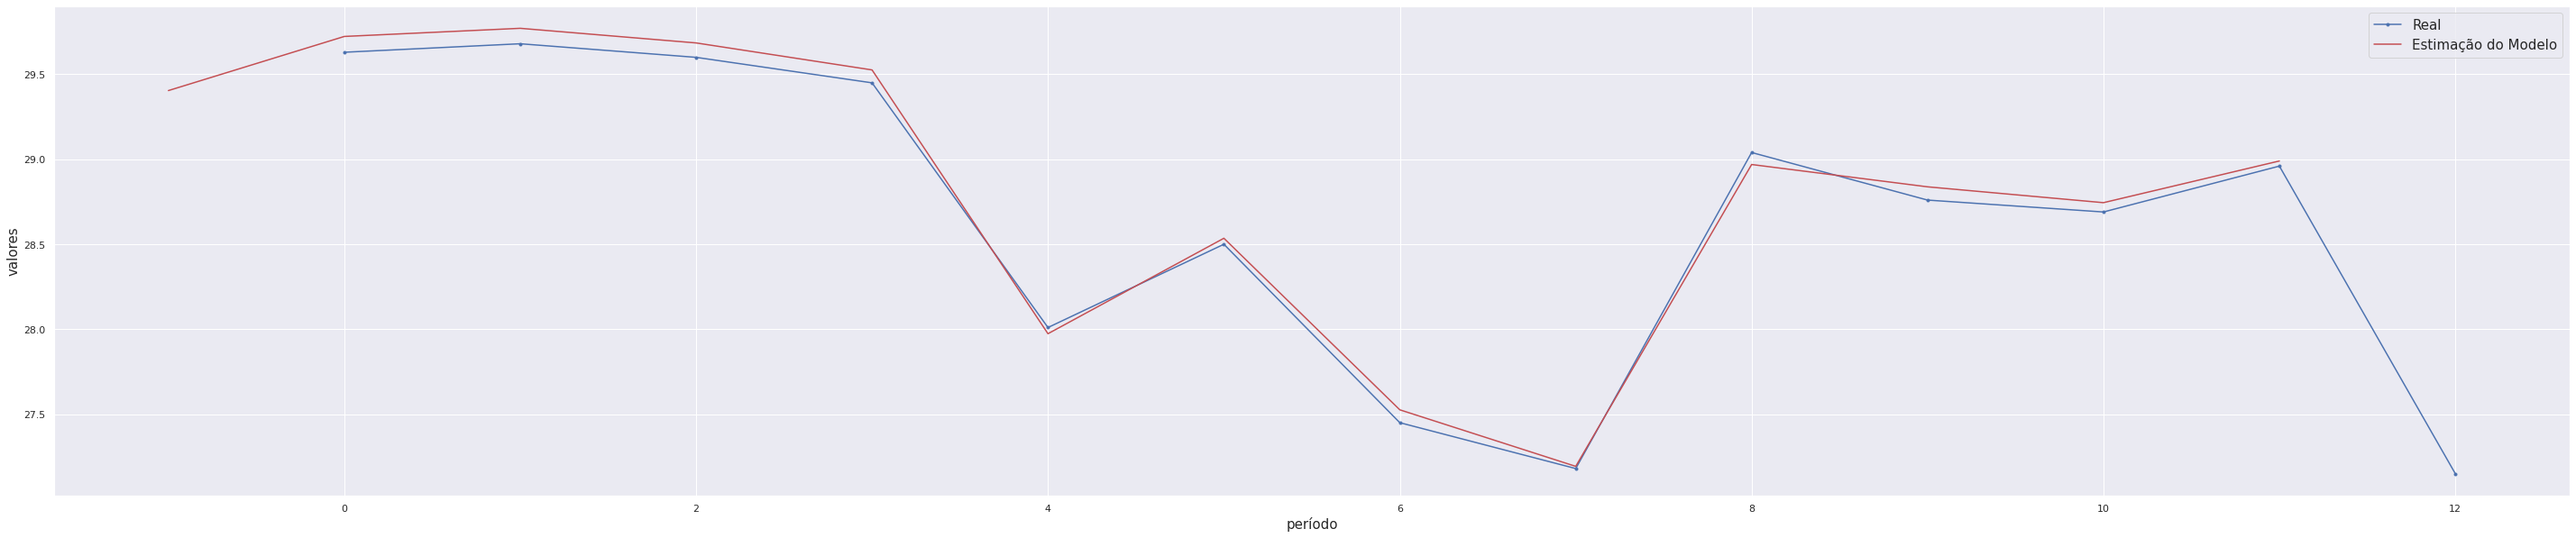

In [12]:
look_back = 1
plt.figure(figsize=(50,10))
plt.plot(list(np.arange(len(intervalo_dos_dados_de_teste))), 
         dados_teste, 
         marker='.', 
         label="Real")

plt.plot(list(np.arange(len(intervalo_dos_dados_de_teste))-look_back), 
         modelo_preditivo, 
         'r',label="Estimação do Modelo")
plt.ylabel('valores', size=15)
plt.xlabel('período', size=15)
plt.legend(fontsize=15)
plt.show()

# **Abordagem por Machine Learning**

In [13]:
!pip install neuralprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 98 kB 7.5 MB/s 
     |████████████████████████████████| 1.6 MB 53.5 MB/s 


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from neuralprophet import NeuralProphet

In [15]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-01,27.320000,27.340000,26.330000,27.040001,16.077499,69430400
2021-09-02,27.000000,27.350000,26.459999,26.600000,15.815884,56052000
2021-09-03,26.650000,26.780001,26.100000,26.330000,15.655346,58182700
2021-09-06,26.209999,26.709999,26.150000,26.459999,15.732640,26770700
2021-09-08,26.290001,26.350000,24.790001,24.969999,14.846712,80378400


In [16]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,41.000000,41.000000,41.000000,41.000000,41.000000,4.100000e+01
mean,27.424634,27.851951,26.927561,27.411463,16.298364,8.166232e+07
std,1.496359,1.484190,1.552663,1.502684,0.893469,2.974698e+07
min,24.080000,24.650000,23.790001,24.650000,14.656447,2.677070e+07
25%,26.080000,26.459999,25.770000,26.330000,15.655346,6.098320e+07
50%,27.209999,27.760000,26.820000,27.180000,16.160740,7.247990e+07
75%,28.830000,29.230000,28.250000,28.760000,17.100180,8.957800e+07
max,29.860001,30.219999,29.510000,29.680000,17.647196,1.573400e+08


In [17]:
df = df.reset_index(level=0)

In [18]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-01,27.320000,27.340000,26.330000,27.040001,16.077499,69430400
1,2021-09-02,27.000000,27.350000,26.459999,26.600000,15.815884,56052000
2,2021-09-03,26.650000,26.780001,26.100000,26.330000,15.655346,58182700
3,2021-09-06,26.209999,26.709999,26.150000,26.459999,15.732640,26770700
4,2021-09-08,26.290001,26.350000,24.790001,24.969999,14.846712,80378400
5,2021-09-09,25.080000,25.879999,24.139999,25.500000,15.161841,156617100
6,2021-09-10,26.020000,26.139999,25.330000,25.340000,15.066709,78379900
7,2021-09-13,25.799999,26.389999,25.639999,26.230000,15.595887,63317900
8,2021-09-14,25.950001,26.250000,25.719999,25.879999,15.387782,65497300
9,2021-09-15,26.000000,26.459999,25.870001,26.330000,15.655346,67274100


In [28]:
df.head()

,ds,y
0,2021-09-01,27.040001
1,2021-09-02,26.600000
2,2021-09-03,26.330000
3,2021-09-06,26.459999
4,2021-09-08,24.969999


In [20]:
# Selecionar apenas as caracteristicas data e preco
df = df[["Date","Close"]] # selecionar Data and Preco

In [21]:
# mudar os nomes das caracteristicas: isso eh necessario para o modelo
df = df.rename(columns = {"Date":"ds","Close":"y"}) #modificar os nomes do dataset


In [25]:
from neuralprophet import NeuralProphet

m = NeuralProphet()

In [26]:
metrics = m.fit(df, freq="D")

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 92.683% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 92.683% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO:NP.utils:Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True

  0%|          | 0/103 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.35E-01, min: 2.25E-01
INFO:NP.utils_torch:lr-range-test results: steep: 9.35E-01, min: 2.25E-01


  0%|          | 0/103 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.16E-02, min: 1.84E-01
INFO:NP.utils_torch:lr-range-test results: steep: 8.16E-02, min: 1.84E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.97E-01
INFO:NP.forecaster:lr-range-test selected learning rate: 1.97E-01
Epoch[1000/1000]: 100%|██████████| 1000/1000 [00:09<00:00, 103.34it/s, SmoothL1Loss=0.00526, MAE=0.41, RMSE=0.498, Loss=0.00448, RegLoss=0]


In [27]:
forecast = m.predict(df)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 92.683% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 92.683% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 92.683% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 92.683% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


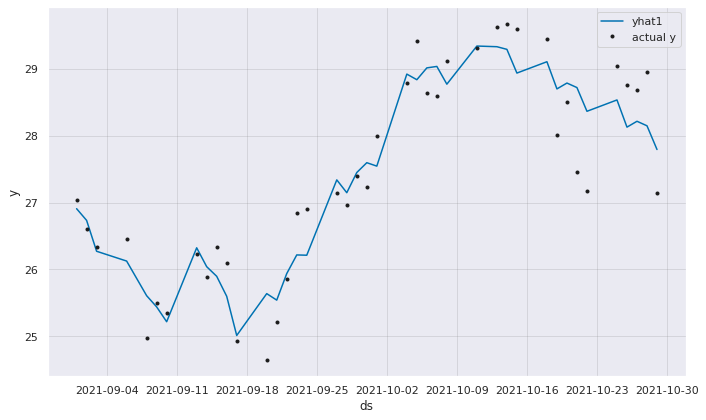

In [30]:
# create plots
fig_forecast = m.plot(forecast)

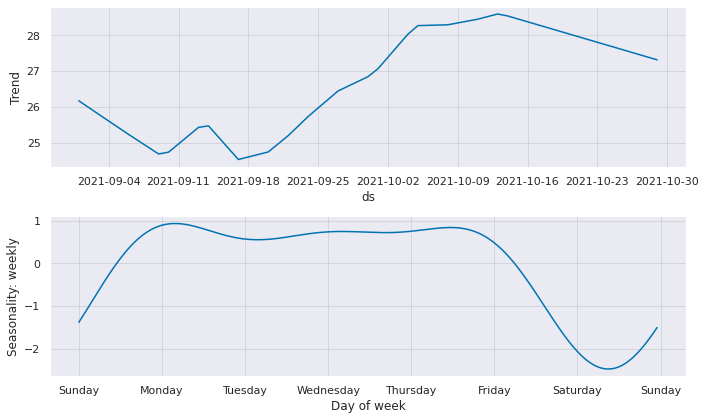

In [31]:
fig_components = m.plot_components(forecast)

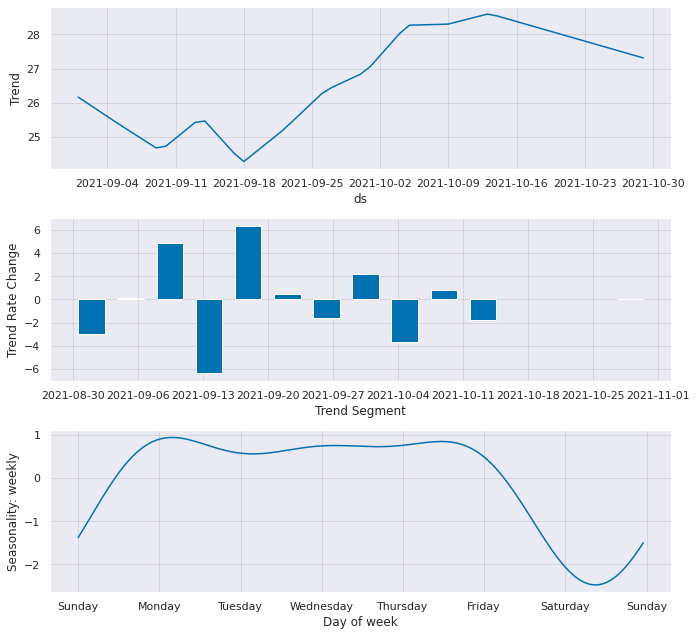

In [32]:
fig_model = m.plot_parameters()

**Fazendo Estimativas**

In [35]:
future = m.make_future_dataframe(df, periods=100)
forecast = m.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 92.683% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 92.683% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.0% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.0% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal t

,ds,y,residual1,yhat1,trend,season_weekly
0,2021-10-30,None,NaN,25.158920,27.229195,-2.070276
1,2021-10-31,None,NaN,25.766209,27.147446,-1.381237
2,2021-11-01,None,NaN,27.963543,27.065695,0.897848
3,2021-11-02,None,NaN,27.556629,26.983946,0.572683
4,2021-11-03,None,NaN,27.644245,26.902195,0.742050


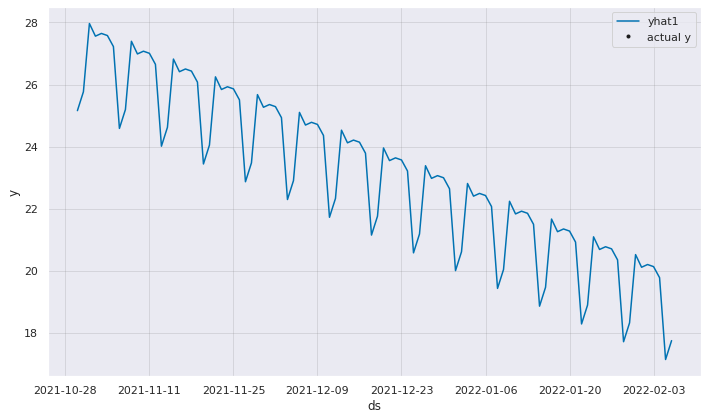

In [36]:
plot1 = m.plot(forecast)